# Claimed Travel Insurance

# Business Problem and Data Understanding

## Business Problem


### Context  
Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik dalam negeri maupun luar negeri. Beberapa negara bahkan telah mewajibkan para turis untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung dari pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Suatu perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk pertanggungan. Data pemegang polis pada perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.

Target: Pemegang polis mengajukan klaim asuransi.

### Problem Statement
  
Penyediaan aset likuid atau uang tunai yang dilakukan perusahaan jika para pemegang polisnya mengajukan klaim membutuhkan waktu karena saat ini aset perusahaan disimpan dalam bentuk yang lain. Perusahaan ingin meningkatkan kepuasan para pemegang polis dengan cara mempercepat proses klaim asuransi. Proses klaim asuransi akan lebih cepat jika pada saat terdapat pemegang polis yang mengajukan klaim dan secara kualifikasi sesuai, perusahaan memiliki uang tunai untuk memberikan klaim tersebut.



### Goals  
Dari permasalahan tersebut, divisi keuangan perusahaan ingin memiliki kemampuan untuk menduga apakah pemegang polis akan mengajukan klaim asuransi.

### Analytic Approach  
Dalam rangka mencapai tujuan tersebut, maka akan dilakukan analisa data terhadap data historis dari para pemegang polis. Dan selanjutnya akan dibangun model klasifikasi agar divisi keuangan perusahaan dapat memprediksi apakah pemegang para pemegang polis akan mengajukan asuransi atau tidak.


### Metric Evaluation  
Type error 1: False Positive (diprediksi pemegang polis mengajukan klaim, kenyatannya tidak)  
Konsekuensi: aset likuid yang disediakan terlalu banyak

Type error 2: False Negative (diprediksi pemegang polis tidak mengajukan klaim, kenyataannya mengajukan klaim)  
Konsekuensi: pemegang polis harus menunggu untuk mendapatkan hak klaim asuransi

Pada kasus ini karena perusahaan ingin meningkatkan kepercayaan para pemegang polis. Model yang akan dibangun akan dioptimasi pada penurunan false negative. Mengingat konsekuensi dari false positive tidak merugikan perusahaan dan memang jika aset likuid yang disediakan terlalu banyak nantinya bisa dikelola oleh divisi keuangan. Hal yang harus dihindari yaitu pemegang polis harus menunggu untuk mendapatkan hak klaim asuransi. Maka dari itu metric evaluation yang menjadi penilaian model adalah recall.


## Data Understanding  


### Feature Information  
  
| Attribute | Description |
| --- | --- |
| Agency | Nama perusahaan |
| Agency Type | Tipe dari perusahaan asuransi perjalanan |
| Distribution Channel | Saluran distribusi dari perusahaan asuransi perjalanan |
| Product Name | Nama dari produk asuransi perjalanan |
| Gender | Jenis kelamin |
| Duration | Lama perjalanan |
| Destination | Tujuan perjalanan |
| Net Sales | Jumlah penjualan polis asuransi perjalanan |
| Commission (in value) | Komisi diterima untuk perusahaan asuransi perjalanan |
| Age | Usia pemegang polis |
| Claim | Pemegang polis memegang mengajukan klaim atau tidak |


In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score


# Imbalance Dataset
from imblearn import pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN,SMOTETomek

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_colwidth', -1)

In [2]:
# Load Data
df= pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [3]:
# Basic Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## Data Cleaning

### Missing Value

In [4]:
total_missing = df.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'total_missing': total_missing})
missing_value_df['percent_missing']=missing_value_df['total_missing']/len(df)*100

missing_value_df.sort_values('total_missing', inplace=True, ascending=False)

missing_value_df

,total_missing,percent_missing
Gender,31647,71.392799
Agency,0,0.000000
Agency Type,0,0.000000
Distribution Channel,0,0.000000
Product Name,0,0.000000
Duration,0,0.000000
Destination,0,0.000000
Net Sales,0,0.000000
Commision (in value),0,0.000000
Age,0,0.000000


Kolom Gender memiliki presentase missing value yang sangat tinggi yaitu sebesar 71,4%. Menghapus missing value ini akan banyak kehilangan informasi dari data. Penanganan missing value pada kolom Gender dengan mengisi kategori jenis kelamin baru yaitu "Other".

In [5]:
df['Gender']=df['Gender'].fillna(value='Other')

### Entry Data Checking

In [6]:
listSample = []
for col in df.columns :
    listSample.append( [col, df[col].nunique(), df[col].unique()])

tableSample = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listSample)
tableSample

,Column Name,Number of Unique,Unique Sample
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,3,"[F, Other, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 7

Dari tabel di atas menunjukkan isi dari dataset tidak menunjukkan suatu masalah yang berarti. Tabel di atas juga memberikan dasar informasi untuk melakukan preprocessing data.  

Kolom Agency adalah berisikan nama perusahaan asuransi perjalanan. Kolom ini tidak akan digunakan lebih lanjut karena secara domain bisnis asuransi, nama perusahaan asuransi tidak ada pengaruhnya terhadap klaim asuransi. Penghapusan kolom ini tidak akan menjadi masalah karena informasinya juga sudah diwakili oleh kolom Agency Type.  

Target feature dari dataset ini yaitu kolom Claim. Guna keperluan pembuatan model, nilai pada kolom ini akan diubah (Yes = 1, No = 0)

In [7]:
df.drop(['Agency'],axis=1, inplace=True)

In [8]:
df['Claim']=np.where(df['Claim']=='Yes',1,0)

### Imbalance Checking

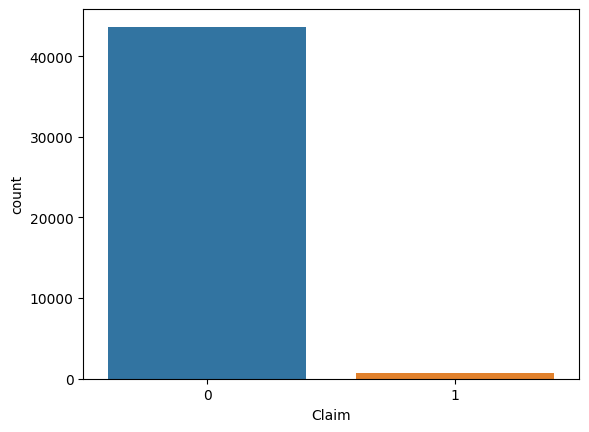

In [9]:
sns.countplot(x=df['Claim'])
plt.show()

Dari grafik di atas terlihat bahwa dataset ini tidak seimbang untuk yang mengajukan klaim dengan tidak mengajukan klaim.

## Data Preparation

In [10]:
listSample = []
for col in df.columns :
    listSample.append( [col, df[col].nunique(), df[col].unique()])

tableSample = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listSample)
tableSample

,Column Name,Number of Unique,Unique Sample
0,Agency Type,2,"[Airlines, Travel Agency]"
1,Distribution Channel,2,"[Online, Offline]"
2,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
3,Gender,3,"[F, Other, M]"
4,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
5,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
6,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
7,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
8,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76, 74, 66, 63, 55, 21, 60, 75, 24, 62, 73, 64, 71, 5, 14, 72, 84, 81, 16, 19, 67, 83, 13, 79, 1

Skenario preprocessing yang akan digunakan untuk dataset ini berdasarkan informasi di atas yaitu:  
- Onehot encoding : Agency Type, Distribution Channel, Gender (Tidak memiliki banyak kategori dan tidak ada urutan dari setiap kategori)
- Binary encoding : Product Name, Destination (Memiliki banyak kategori)

In [11]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type','Distribution Channel', 'Gender']),
    ('binary', ce.BinaryEncoder(), ['Product Name', 'Destination'])
], remainder='passthrough')

In [12]:
x = df.drop(columns=['Claim'])
y = df['Claim']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               stratify=y,
                                               test_size=0.2,
                                               random_state=1999)

## Modeling

In [14]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
nn = MLPClassifier(hidden_layer_sizes=(10,))

### Model Benchmarking

In [15]:
models = [logreg,knn,dt,rf,svm,nn]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

In [16]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network'],
              'mean recall':rata,'sdev':std}).sort_values(by='mean recall',ascending=False).set_index('model')

,mean recall,sdev
model,,
Decision Tree,0.086765,0.022410
Neural Network,0.020370,0.040741
Random Forest,0.016582,0.006838
KNN,0.007390,0.010795
Logistic Regression,0.000000,0.000000
SVM,0.000000,0.000000


### Model Benchmarking on Testing Data

In [17]:
models = [logreg,knn,dt,rf,svm,nn]
score_recall=[]

def y_pred_f(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i in models:
    estimator,y_pred,x_test = y_pred_f(i)
    score_recall.append(recall_score(y_test,y_pred))


In [18]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network'],
              'recall_score':score_recall}).sort_values(by='recall_score',ascending=False).set_index('model')

,recall_score
model,
Decision Tree,0.051852
Logistic Regression,0.007407
KNN,0.007407
Random Forest,0.000000
SVM,0.000000
Neural Network,0.000000


Dari hasil model benchmarking diketahui bahwa model yang memiliki Recall terbesar adalah Decision Tree. Meskipun masih memiliki nilai Recall yang sangat kecil.
Asumsikan Decision Tree ini adalah model yang terbaik. Lalu kemudian akan ditingkatkan performa model ini dengan over sampling mengingat dataset ini imbalance.

### Perform Balancing

In [19]:

dt=DecisionTreeClassifier()

estimator = pipeline.Pipeline([
        ('preprocess',transformer),
        ('sampling',SMOTEENN()),
        ('model',dt)])


estimator.fit(x_train, y_train)


y_pred = estimator.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8731
           1       0.05      0.16      0.08       135

    accuracy                           0.94      8866
   macro avg       0.52      0.56      0.53      8866
weighted avg       0.97      0.94      0.96      8866



In [20]:
dt=DecisionTreeClassifier()

estimator = pipeline.Pipeline([
        ('preprocess',transformer),
        ('model',dt)])


estimator.fit(x_train, y_train)


y_pred = estimator.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8731
           1       0.05      0.05      0.05       135

    accuracy                           0.97      8866
   macro avg       0.52      0.52      0.52      8866
weighted avg       0.97      0.97      0.97      8866



Memang dengan adanya balancing meningkatkan nilai recall. Maka model Decision Tree menggunakan balancing.

### Hyperparameter Tuning

In [29]:
hyperparameters = [{
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [10,50,100]

}]

In [30]:
dt=DecisionTreeClassifier()

smote_enn = SMOTEENN()

estimator = pipeline.Pipeline([
        ('preprocess',transformer),
        ('sampling',smote_enn),
        ('model',dt)])


In [31]:
rs = RandomizedSearchCV(estimator, 
                    hyperparameters, 
                    scoring='recall',
                    n_iter=10,
                    verbose=1,
                    cv=StratifiedKFold(n_splits=5))

In [32]:
rs.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel',
                                                                                'Gender']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Product '
                                                                                'Name',
                                                                                'Destination'])])),
                                             ('sampling', SMOTEENN()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': [10, 50, 100]}],
                   scoring='recall', verbose=1)

In [33]:
print("best param: ",rs.best_params_)
print("best score: ",rs.best_score_)

best param:  {'model__max_depth': 10, 'model__criterion': 'entropy'}
best score:  0.5460074753652735


In [34]:
best_model = rs.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name',
                                                   'Destination'])])),
                ('sampling', SMOTEENN()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

In [35]:
estimator.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name',
                                                   'Destination'])])),
                ('sampling', SMOTEENN()), ('model', DecisionTreeClassifier())])

In [36]:
y_pred_default = estimator.predict(x_test)

y_pred_tuned = best_model.predict(x_test)


recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

print('Recall Score Default : ', recall_default)
print('Recall Score Tuned : ', recall_tuned)

Recall Score Default :  0.15555555555555556
Recall Score Tuned :  0.6296296296296297


In [37]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default: \n', report_default)
print('Classification Report Tuned: \n', report_tuned)

Classification Report Default: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      8731
           1       0.05      0.16      0.08       135

    accuracy                           0.94      8866
   macro avg       0.52      0.56      0.52      8866
weighted avg       0.97      0.94      0.96      8866

Classification Report Tuned: 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      8731
           1       0.06      0.63      0.12       135

    accuracy                           0.86      8866
   macro avg       0.53      0.74      0.52      8866
weighted avg       0.98      0.86      0.91      8866

